# 13 Reasons Py
* more details here
* more details here

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

## Define initial variables

In [2]:
# File path for Substance Abuse & Mental Health Service Facilities (SAMHS)
SAMHS_File = "Resources/MentalHealth_SubstanceAbuse_Facilities.csv"

# File path for FED Crime Data (change the file name as required)
CrimeData_File = "Resources/CrimeData.csv"

# List of States to compare ?
State_list = ["NY","NC","OR","TX","MN"]

## SAMHS Facility Data

In [3]:
# Read SAMHS data to Dataframe
SAMHS_df = pd.read_csv(SAMHS_File)

# Group the data based on State
SAMHS_byState = SAMHS_df.groupby(["state"])

# Get count of Facility for each state, and create a Data frame
SAMHS_StateCount_df = pd.DataFrame({"Facility Count" : SAMHS_byState["name1"].count()})

# Reset the index, to have the state as a column/field
SAMHS_StateCount_df.reset_index(inplace=True)

# Preview dataframe
SAMHS_StateCount_df

,state,Facility Count
0,AK,170
1,AL,260
2,AR,311
3,AS,2
4,AZ,708
5,CA,1862
6,CO,533
7,CT,414
8,DC,52
9,DE,61


In [4]:
# if needed - Filter by State
SAMHS_df = SAMHS_StateCount_df[SAMHS_StateCount_df.state.isin(State_list)]
#SAMHS_df = SAMHS_StateCount_df
# Preview Dataframe
SAMHS_df

,state,Facility Count
26,MN,570
31,NC,713
38,NY,1512
41,OR,332
49,TX,755


## Crime Data

In [5]:
# Read Crime data to Dataframe
CrimeData_df = pd.read_csv(CrimeData_File)
CrimeData_df = CrimeData_df[["state","year","population","total crime"]]
CrimeData_df

,state,year,population,total crime
0,AK,2017,739786,65221.0
1,AL,2017,4875120,339189.0
2,AR,2017,3002997,223368.0
3,AZ,2017,7048876,482481.0
4,CA,2017,39399349,2339968.0
5,CO,2017,5615902,346919.0
6,CT,2017,3573880,144013.0
7,DC,2017,695691,73648.0
8,DE,2017,957078,55752.0
9,FL,2017,20976812,1226817.0


In [6]:
# if needed - Filter by State
# Crime_df = CrimeData_df[CrimeData_df.state.isin(State_list)]
Crime_df = CrimeData_df
Crime_df

,state,year,population,total crime
0,AK,2017,739786,65221.0
1,AL,2017,4875120,339189.0
2,AR,2017,3002997,223368.0
3,AZ,2017,7048876,482481.0
4,CA,2017,39399349,2339968.0
5,CO,2017,5615902,346919.0
6,CT,2017,3573880,144013.0
7,DC,2017,695691,73648.0
8,DE,2017,957078,55752.0
9,FL,2017,20976812,1226817.0


## Combine Facility and Crime Data

In [7]:
# Combine SAMHS Facility Dataframe and Crime Dataframe
Reasons13_df = pd.merge(SAMHS_df, Crime_df, how="inner", on="state")
Reasons13_df

,state,Facility Count,year,population,total crime
0,MN,570,2017,5568155,272084.0
1,NC,713,2017,10270800,608297.0
2,NY,1512,2017,19590719,729373.0
3,OR,332,2017,4146592,269286.0
4,TX,755,2017,28322717,1697564.0


# Link to Federal report,  showing crime per 100,000 population
[Federal 2017 report](https://www.fbi.gov/news/pressrel/press-releases/fbi-releases-2017-crime-statistics)

In [8]:
# Data Mupulation / conversion

#Facility Count / population, and per 100k, defined earlier per_population = 100,000
Reasons13_df["Facility Count (per 100K)"] = Reasons13_df["Facility Count"] * 100000.0 / Reasons13_df["population"]
Reasons13_df["crime count (per 100K)"] = Reasons13_df["total crime"] * 100000.0 / Reasons13_df["population"]

# preview DF
Reasons13_df.sort_values('Facility Count (per 100K)',ascending=True)

,state,Facility Count,year,population,total crime,Facility Count (per 100K),crime count (per 100K)
4,TX,755,2017,28322717,1697564.0,2.665705,5993.648138
1,NC,713,2017,10270800,608297.0,6.942010,5922.586361
2,NY,1512,2017,19590719,729373.0,7.717940,3723.053758
3,OR,332,2017,4146592,269286.0,8.006575,6494.152306
0,MN,570,2017,5568155,272084.0,10.236784,4886.430065


In [20]:
#Average National crime per 100k 

# average_clinics =  pd.Series([])
average_clinics = Reasons13_df["Facility Count (per 100K)"].mean()
average_clinics = pd.Series([average_clinics])
average_clinics

0    7.113803
dtype: float64

In [22]:
#Average crime in the US 

# average_crime =  pd.Series([])
average_crime = Reasons13_df["crime count (per 100K)"].mean()
average_crime = pd.Series([average_crime])
average_crime

0    5403.974126
dtype: float64

In [50]:
#Crime scatter plot with national average 

facility_count =  Reasons13_df["Facility Count (per 100K)"]
facility_count=facility_count.append(average_clinics).reset_index()

facility_df = pd.DataFrame(facility_count)
facility_df

x_axis = facility_count

data = Reasons13_df["crime count (per 100K)"]
data = data.append(average_crime).reset_index()

# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#               s=x_axis, alpha=0.75)

## Place for Bar / Line

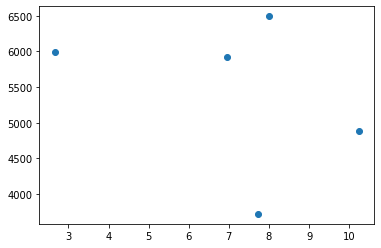

In [12]:
plt.scatter(Reasons13_df["Facility Count (per 100K)"], Reasons13_df["crime count (per 100K)"], marker="o")

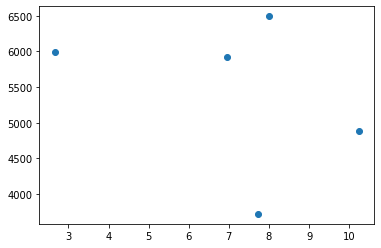

In [13]:
# only for listed states
Reasons13_reduced_df = Reasons13_df[Reasons13_df.state.isin(State_list)]
plt.scatter(Reasons13_reduced_df["Facility Count (per 100K)"], Reasons13_reduced_df["crime count (per 100K)"], marker="o")

## Chart 2

## Chart 3

## Statistical Significance Test

In [14]:
stats.ttest_1samp(Reasons13_reduced_df["Facility Count (per 100K)"], Reasons13_reduced_df["crime count (per 100K)"].mean())

Ttest_1sampResult(statistic=-4353.855495614591, pvalue=1.6697638512638167e-14)